## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape #number of samples in train

(60000, 28, 28)

In [4]:
x_test.shape #number of samples in test

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [5]:
x_train[:0,:,:].shape  #shape of the image is 28*28

(0, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
import numpy as np
np.unique(y_train).shape  #to find the number of classes in y

(10,)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train/255

In [0]:
x_test=x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')    # The digit 1 signifies the images are in grayscale
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
model = tf.keras.Sequential()

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.LayerNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]
model.fit(x_train,y_train ,batch_size=32,callbacks=callback_list,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.3732 - acc: 0.8710 - val_loss: 0.3244 - val_acc: 0.8793
Epoch 2/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2176 - acc: 0.9179 - val_loss: 0.2541 - val_acc: 0.9108
Epoch 3/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.1541 - acc: 0.9426 - val_loss: 0.2834 - val_acc: 0.9085
Epoch 4/10
60000/60000 [==============================] - 15s 243us/sample - loss: 0.1069 - acc: 0.9605 - val_loss: 0.3159 - val_acc: 0.9094
Epoch 5/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0759 - acc: 0.9720 - val_loss: 0.4318 - val_acc: 0.9008
Epoch 6/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0573 - acc: 0.9796 - val_loss: 0.4031 - val_acc: 0.9069
Epoch 7/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0434 - acc: 0.9840 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [15]:
model1= tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides =(2,2), padding='valid'))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.LayerNormalization())
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(x_train,y_train ,batch_size=32,callbacks=callback_list,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.3721 - acc: 0.8636 - val_loss: 0.2739 - val_acc: 0.8993
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2450 - acc: 0.9090 - val_loss: 0.2562 - val_acc: 0.9067
Epoch 3/10
60000/60000 [==============================] - 10s 172us/sample - loss: 0.2027 - acc: 0.9239 - val_loss: 0.2369 - val_acc: 0.9185
Epoch 4/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1722 - acc: 0.9353 - val_loss: 0.2447 - val_acc: 0.9183
Epoch 5/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.1505 - acc: 0.9430 - val_loss: 0.2491 - val_acc: 0.9218
Epoch 6/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1303 - acc: 0.9510 - val_loss: 0.2561 - val_acc: 0.9216
Epoch 7/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.1106 - acc: 0.9578 

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.5)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

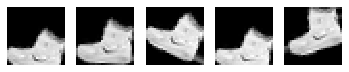

In [18]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [19]:
model1.fit_generator(datagen.flow(x_train,y_train ,batch_size=32),steps_per_epoch = len(x_train) // 32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.8185 - acc: 0.7007 - val_loss: 0.3904 - val_acc: 0.8638
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5959 - acc: 0.7797 - val_loss: 0.4035 - val_acc: 0.8526
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5435 - acc: 0.7988 - val_loss: 0.3905 - val_acc: 0.8642
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5099 - acc: 0.8104 - val_loss: 0.3827 - val_acc: 0.8651
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4916 - acc: 0.8189 - val_loss: 0.3724 - val_acc: 0.8698
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4742 - acc: 0.8235 - val_loss: 0.3619 - val_acc: 0.8746
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4613 - acc: 0.8303 - val_loss: 0.3617 - val_acc: 0.8726
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [20]:
scores = model1.evaluate(x_train, y_train, verbose=0)
print("Train Accuracy: %.2f%%" % (scores[1]*100))


Train Accuracy: 89.02%


In [21]:
scores = model1.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))


Test Accuracy: 87.93%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
#already imported in this notebook

### **Load CIFAR10 dataset**

In [23]:
from keras.datasets import cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

Using TensorFlow backend.


In [24]:
print('Train: X=%s, y=%s' % (xtrain.shape, ytrain.shape))
print('Test: X=%s, y=%s' % (xtest.shape, ytest.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [0]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [0]:
xtrain=xtrain.reshape(xtrain.shape[0],32,32,3).astype('float32')
xtest=xtest.reshape(xtest.shape[0],32,32,3).astype('float32')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(rotation_range=30,height_shift_range=0.5,width_shift_range=0.9,horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(xtrain)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

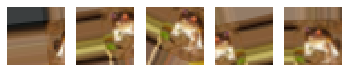

In [29]:
from matplotlib import pyplot as plt
gen = data_gen.flow(xtrain[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()